# 1. Introduction

### Descripció del contingut
En aquesta notebook explicarem com funciona un dels entorns ml-agents. Investigarem el codi de reinforcement learning que permet als agents entrenar per cumplir un objectiu i el modificarem per intentar assolir un objectiu extra. També acompanyarem les explicacións amb grafics extrets dels entrenaments i explicarem els resultats obtinguts 


### Informació dels integrants del grup
Nom: Adam Tubau

Correu: adamtubauvilar@enti.cat

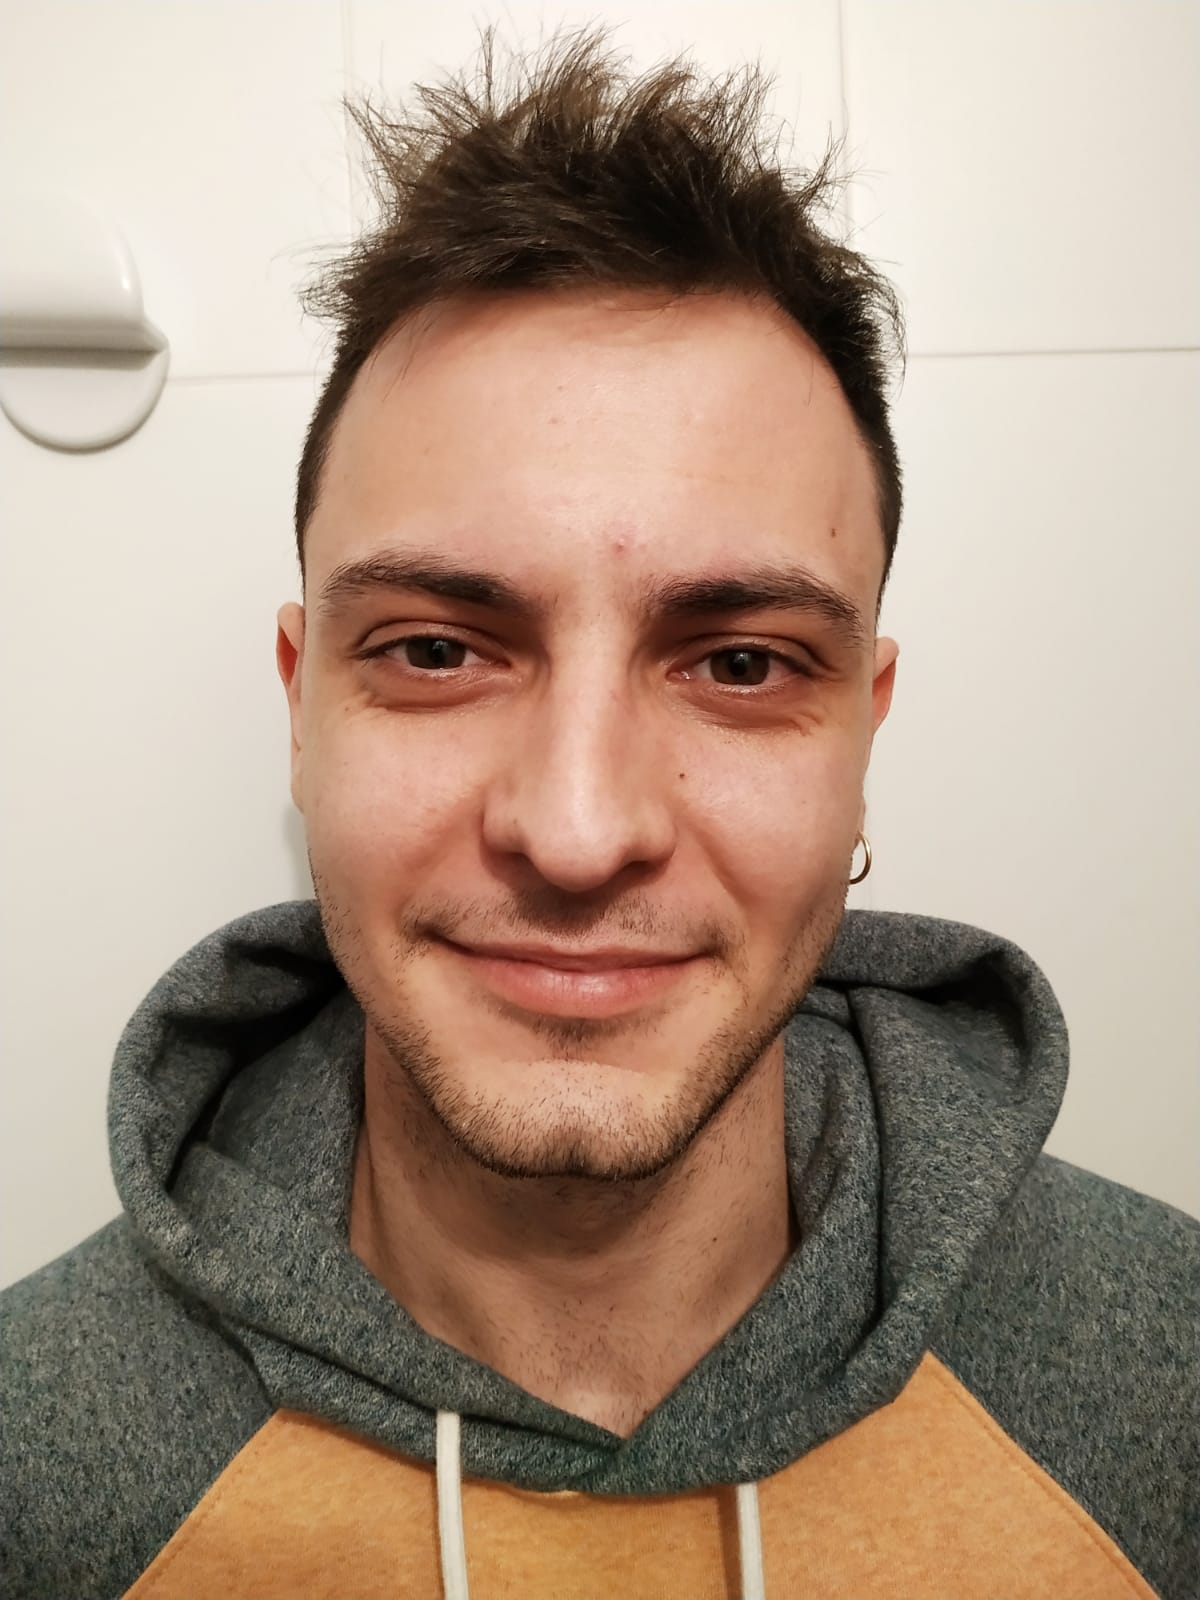

In [10]:
from IPython.display  import Image
Image(filename = "img/Adam.jpeg", width = 150, height = 200)

Nom: Nil Bellmunt

Correu: nilbellmuntperez@enti.cat

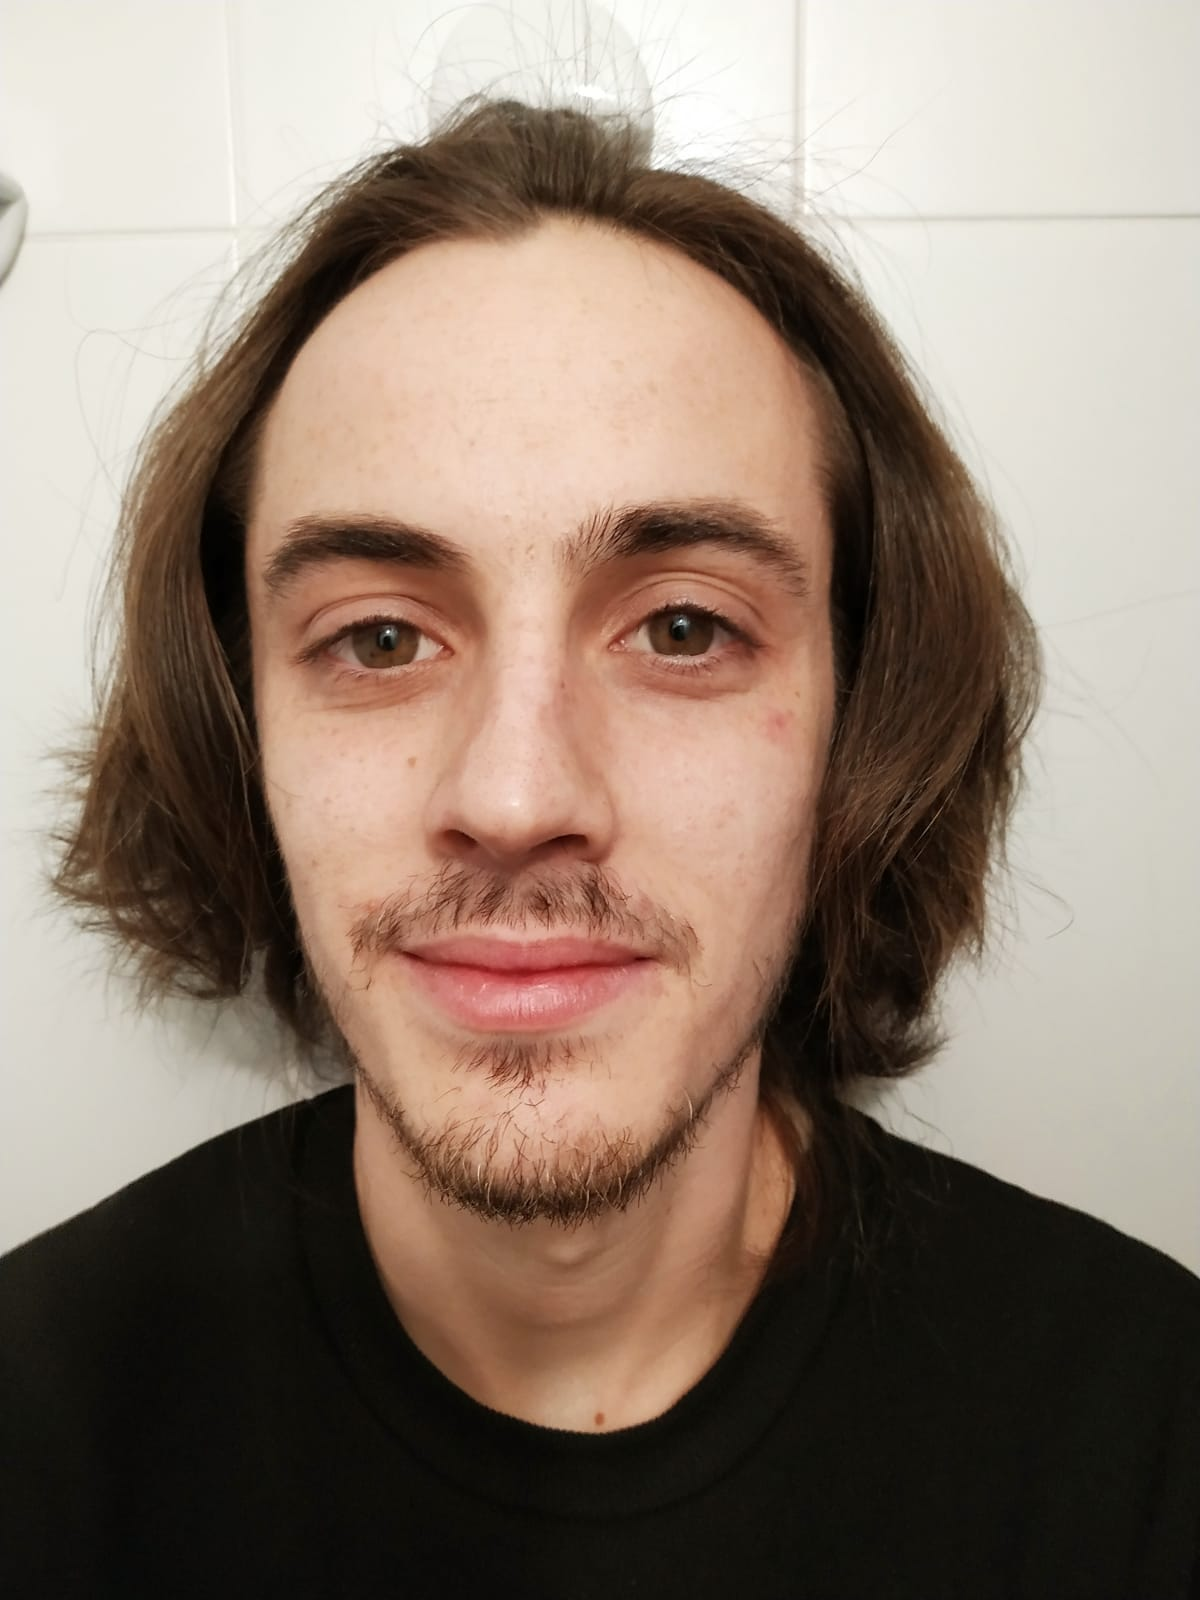

In [8]:
from IPython.display  import Image
Image(filename = "img/Nil.jpeg", width = 150, height = 200)

# 2. Case analysis

Analitzarem el cas del crawler. Es una aranya quadrupeda que es mou en un mapa quadrat tancat i ha d'arribar a tocar un target (cub verd) que apareix a una posició aleatoria del mapa. Si el cos de l'aranya toca el terra torna a començar. 

Es donen una serie de rewards, tant negatius com positius, en funció de les accions de l'agent. Aquest rewards es poden activar i desactivar abans de l'entrenament per que tingui diferents comportaments. L'agent sempre buscarà fer les accions que li permetin maximitzar els rewards positius. 

A continuació explicarem les funcions en les que es donen els rewards, aquestes funcions es criden a cada iteració:

##### void RewardFunctionMovingTowards()
Es dóna un reward de 0.03 multiplicat per el producte escalar entre la seva velocitat i el vector de direcció al target. Aquest reward pot ser tant positiu com negatiu depenent de la direcció de la velocitat de l'agent.  

##### RewardFunctionTimePenalty();
Es dona un reward de -0.001. Això fa que l'agent entreni tenint en compte el temps que tarda en arribar a l'objectiu.

##### RewardFunctionFacingTarget();
Es dóna un reward de 0.01 multiplicat per el producte escalar entre el seu vector frontal i el vector de direcció al target. Aquest reward pot ser tant positiu com negatiu depenent de la direcció dl vector frontal de l'agent. 

Els valors d'aquests rewards faran que l'aguent prioritzi més unes accions que altres.

##### Explicació del funcionament general
El brain s'encarrega de cridar diverses funcions d'agent i rebre feedback per obtimitzar les pròximes decisions.

DecideAction() agafa les desicions preses pel Brain i se'l guarda en un vector que l'utilita en Agent Step

El brain crida AgentStep() quan vol aplicar rotacions als joints de l'agent.

AgentStep() té una funció virtual AgentActions() que 
CrawlerAgent sobreescriu per fer el seu propi calcul de rotacions en els joints.

m_Info es una variable de tipus AgentInfo que s'utilitza per guardar la informació al final de cada simulació. El contingut de la classe es la següent:
-vector actions
-reward
-steps
-action masks

Cada cop que arriba al target o el cos toca al terra es reseteja la simulació i es crida AgentReset() que reseteja el transform del crawler i posa el target a una posició aleatoria



# 3. Performance analisis

Les següents gràfiques estan tretes d’entrenar l’Agent crawler amb el codi per defecte.
##### Envirmoment/Cumulative reward: 
Es el reward que obté l’agent al llarg de les iteracions. En una simulació satisfactoria hauria de tendir a pujar.

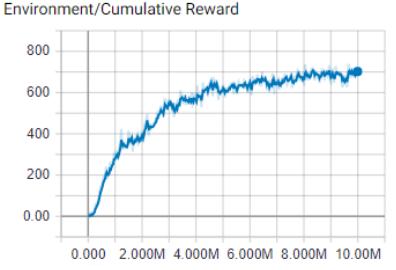

In [1]:
from IPython.display  import Image
Image(filename = "img/1.png", width = 400, height = 400)

##### Enviroment/Episode length: 
El temps que dura cada episodi per tots els agents. Aquest paràmetre depèn molt de com sigui el cas a analitzar. En el nostre cas primer es queda sense saber q fer fins cap a la iteració 700k que comença a trobar el cami cap al target

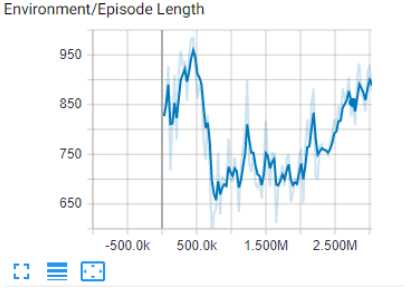

In [15]:
from IPython.display  import Image
Image(filename = "img/2.png", width = 400, height = 400)

##### Policy Statistics/Entropy: 
Mostra com de aleatòries son les decisions que fa l’agent, en un entrenament amb èxit hauria de decreixer tal i com fa aquest gràfic.

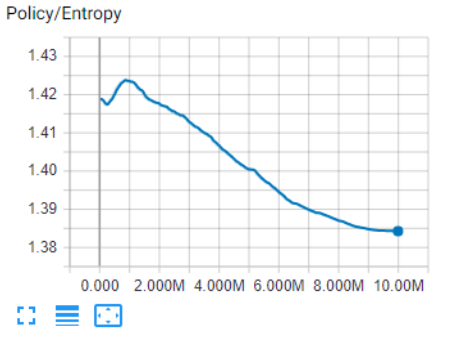

In [16]:
from IPython.display  import Image
Image(filename = "img/3.png", width = 400, height = 400)

##### Policy Statistics/Value estimate: 
Mostra el valor estimat de tots els estats que visita l’agent. Hauria d’augmentar al llarg d’un entrenament exitós


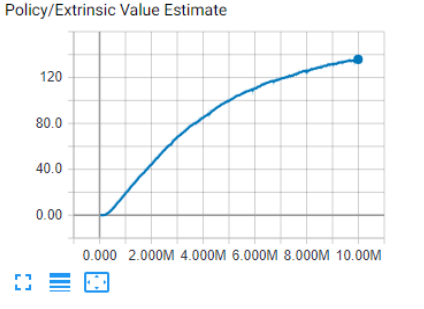

In [17]:
from IPython.display  import Image
Image(filename = "img/4.png", width = 400, height = 400)

##### Policy Statistics/Learning rate: 
Com de llarg es un step dins de l’algoritme d’entrenament per trobar el camí òptim.

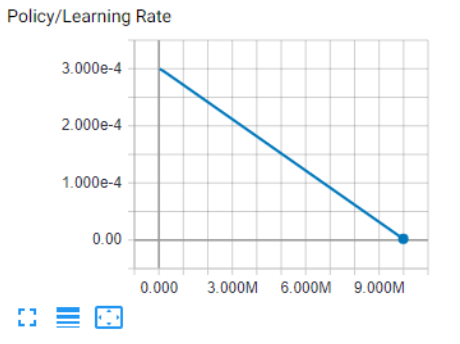

In [18]:
from IPython.display  import Image
Image(filename = "img/5.png", width = 400, height = 400)

##### Losses/Policy loss:
Mostra com canvia el procés de decidir accions. Hauria de decreixer al llarg del temps.

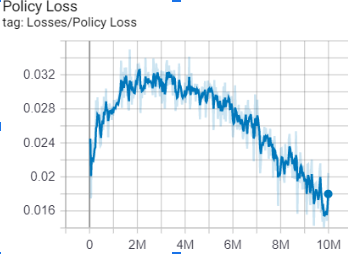

In [19]:
from IPython.display  import Image
Image(filename = "img/6.png", width = 400, height = 400)

##### Losses/Value loss: 
Mosta com de correctament el model està anticipan-se al valor de cada estat. Hauria d’incrementar si el model està aprenent exitosament.


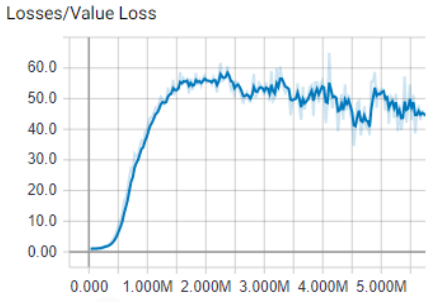

In [20]:
from IPython.display  import Image
Image(filename = "img/7.png", width = 400, height = 400)

# 4. New case proposal

Farem una modificació a l'escenari en el que inclourem obstacles en forma de taulada. L'objectiu dels entrenaments que farem es que l'agent "reconegui" els obstacles i els pugui esquivar.


### Procés:

Vam probar diferents maneres per intentar aconseguir aquest comportament en l'agent. Finalment no hem aconseguit entrenar un model que es comporti de la manera que buscavem pero explicarem el procés d'entrenament dels diversos agents.

#### Primera proposta

4 raycast en les direccions x, -x, z y -z.
Aquests raycasts donaben rewards negatius (-0.02) en un update sempre que estaven en contacte amb algun obstacle.

Reward negatiu (-1) quan colisionés alguna pota amb cualsevol obstacle i resetejes l'escena, igual que fa amb el cos quan toca el terra.

Aquests grafics de sota mostren el reward que obté. Com es pot veure es inferior al del model entrenat sense obstacles, ja que en el de obstacles no sempre arribava al target i, si ho feia, trigava més.

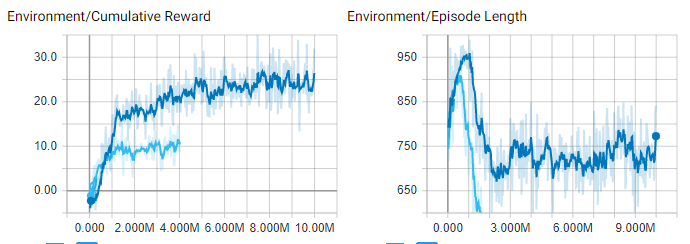

In [1]:
from IPython.display  import Image
Image(filename = "img/12.png", width = 400, height = 400)

Després de 4M d'iteracions vam decidir parar-lo perque no donava mostres d'aprenentatge.

#### Segona proposta

S'ha modificat la seguent funcio que es crida cada frame.

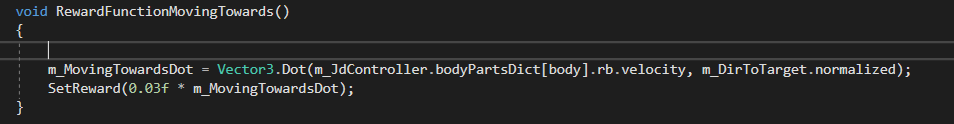

In [2]:
from IPython.display  import Image
Image(filename = "img/Code1.png", width = 400, height = 400)

Ara, es dona reward negatiu si hi ha un obstacle entre l’agent i el target i reward positiu si no hi ha obstacle. Aquesta funció s’executa cada frame. 

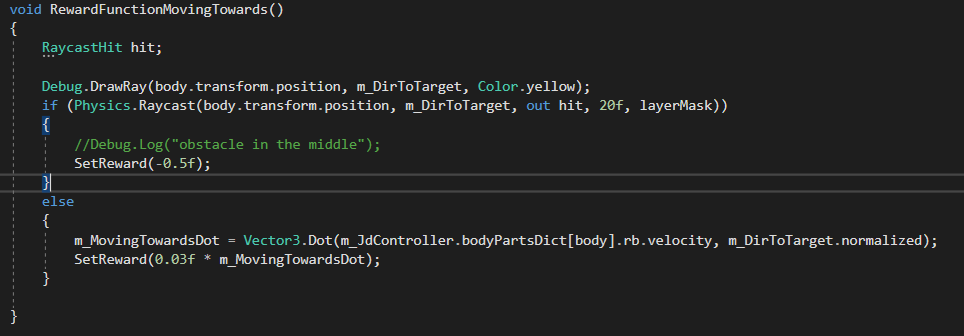

In [3]:
from IPython.display  import Image
Image(filename = "img/Code2.png", width = 400, height = 400)

En aquest cas l'agent veu que colisionant el cos amb el terra i resetejant l'escena es com més maximitza els rewards ja que amb aquesta funció acaba tenint masses negatius. 

Com es pot veure als grafics de sota, comença amb uns rewards negatius de -70 aproximadament i cada cop tendeix a 0 fent que la simulació duria cada com menys. Gràcies a aquest cas es pot arribar a la conclusió de que masses rewards negatius pot fer que els agents busquin acabar rapid la simulació.

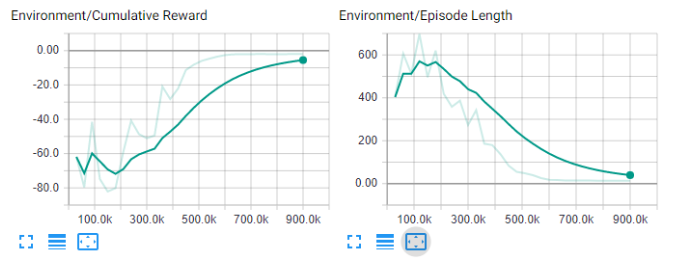

In [22]:
from IPython.display  import Image
Image(filename = "img/8.png", width = 400, height = 400)

#### Terceraproposta

Igual que la proposta anterior pero reduint el reward negatiu de -0.5 a -0.01 en cada frame.

En les grafiques de sota es compara amb el primer cas i amb el per defecte. Es pot veure que el reward es superior al primer pero segueix sent inferior al per defecte. 

En el mon fisic, l'agent te una conducta semblant a la per defecte, anant cap al target sense tenir en conte els obstacles i s'hi encalla.

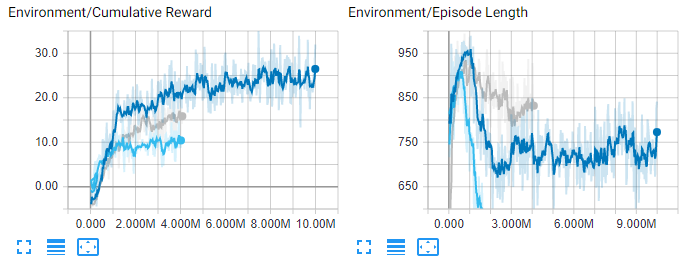

In [2]:
from IPython.display  import Image
Image(filename = "img/13.png", width = 400, height = 400)

Amb totes aquestes implementacions l'agent ignorava el target i intentava mantenir-se de peu el major temps possible.
La majoria de comportaments seguien un patró semblant al inicial pero sense seguir el comportament desitjat.


# 5. Team


| Names | Picture | Email |
| --- | --- | --- |
| Nil |![title](img/Nil.jpeg) | nilbellmuntperez@enti.cat|
| Adam |![title](img/Adam.jpeg) | adamtubauvilar@enti.cat |